<a href="https://colab.research.google.com/github/Aldanapat/Proyecto_integrador2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armae un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define possible values for columns
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Educación Física', 'Inglés', 'Ciudadanía', 'Artes']
apellidos = ['González', 'Rodríguez', 'Pérez', 'García', 'López', 'Martínez', 'Sánchez', 'Fernández', 'Gómez', 'Díaz']
nombres = ['Juan', 'Ana', 'Pedro', 'María', 'Luis', 'Laura', 'Carlos', 'Sofía', 'José', 'Elena']


# Create a DataFrame with 100 rows
df = pd.DataFrame({
    'Apellido': [random.choice(apellidos) for _ in range(100)],
    'Nombre': [random.choice(nombres) for _ in range(100)],
    'nro_dni': np.random.randint(10000000, 99999999, size=100),
    'Materia escolar': [random.choice(materias) for _ in range(100)],
    'Nota 1er Trimestre': np.random.randint(1, 11, size=100),
    'Nota 2do Trimestre': np.random.randint(1, 11, size=100),
    'Nota 3er Trimestre': np.random.randint(1, 11, size=100),
    'Faltas a clases': np.random.randint(0, 20, size=100)  # Faltas hasta 20
})

# Display the DataFrame
df

,Apellido,Nombre,nro_dni,Materia escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,García,Ana,91829256,Artes,2,4,4,7
1,Díaz,Elena,50643343,Artes,9,1,1,16
2,García,Elena,61491387,Historia,7,8,7,5
3,González,Luis,90087976,Geografía,1,4,6,18
4,Gómez,José,68037170,Lengua y Literatura,5,7,10,2
...,...,...,...,...,...,...,...,...
95,Pérez,Elena,72856420,Inglés,1,4,9,17
96,Sánchez,Luis,83129438,Historia,8,1,5,16
97,Pérez,José,69797349,Ciudadanía,2,9,1,5
98,Pérez,Carlos,52853806,Artes,10,3,3,4


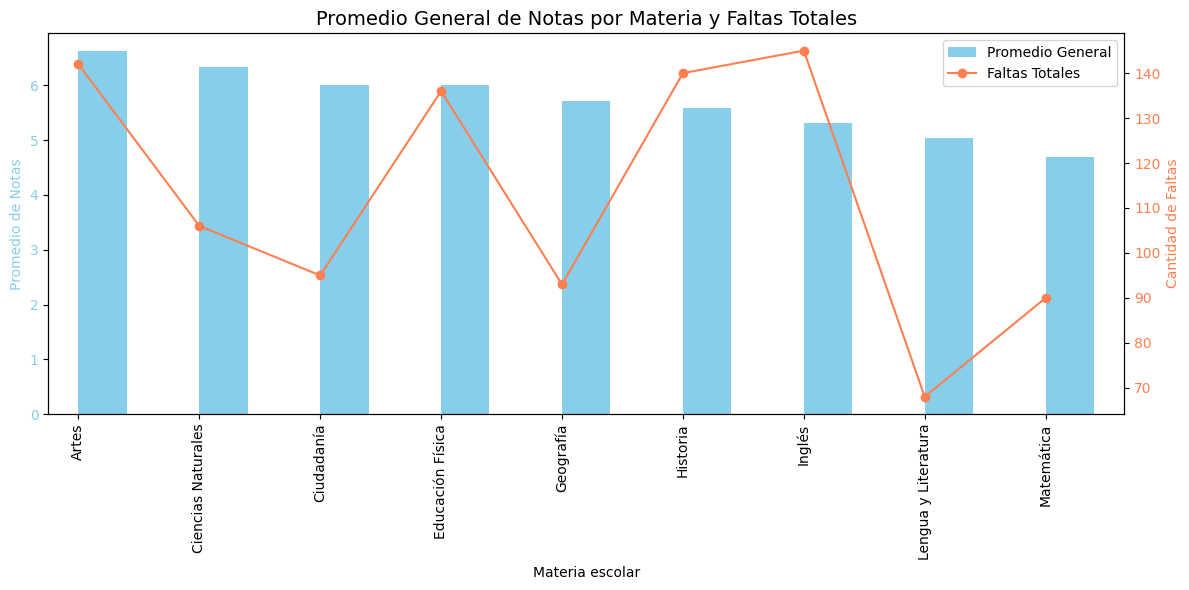

In [4]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average grade for each subject
average_grades = df.groupby('Materia escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)
average_grades = average_grades.sort_values(ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia escolar')['Faltas a clases'].sum()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average grades
average_grades.plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4, label='Promedio General')
ax1.set_ylabel('Promedio de Notas', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for absences
ax2 = ax1.twinx()
total_absences.plot(kind='line', ax=ax2, marker='o', color='coral', label='Faltas Totales')
ax2.set_ylabel('Cantidad de Faltas', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Add title and labels
plt.title('Promedio General de Notas por Materia y Faltas Totales', fontsize=14)
plt.xlabel('Materia Escolar', fontsize=12)

# Adjust layout
fig.tight_layout()

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Show the plot
plt.show()

In [5]:
df.to_csv("datos_alumnos.csv", index=False)
